In [75]:
import pandas as pd

In [76]:
for i in range(20,21):
    rentdata=pd.read_excel("bd_sistema-indices-alquiler-vivienda_2015-2020.xlsx",sheet_name="Municipios ", usecols="C,M,AG,BA,BU,CO,DI")
    rentdata=rentdata.dropna(thresh=2)
    rentdata['CUMUN']=rentdata["CUMUN"].astype(str).str.rjust(5,'0')
    rentdata=rentdata[['CUMUN', 'ALQTBID12_M_VC_20']]
    #rentdata= rentdata[rentfile.CUMUN != set(rentdata.CUMUN)-set(pob.code)] #codi per si algun municipi del lloguer no està a la població
    
rentdata=rentdata.rename(columns={'CUMUN': 'CODE'})
rentdata=rentdata.rename(columns={'ALQTBID12_M_VC_20': 'ALQ'})
rentdata=rentdata.set_index('CODE')
rentdata

,ALQ
CODE,
02003,450.000000
02007,318.260870
02008,250.000000
02009,348.856209
02012,350.000000
...,...
50252,300.000000
50272,445.308442
50288,449.998333


In [77]:
import pandas as pd
# read choosen data file
buss = pd.read_excel("Comp21.xlsx", index_col=0, header=0)
buss = buss.reset_index()

# add specific municipality code in extra column
buss["CODE"] = [x[0:5] for x in buss.Municipios]



# show loaded table:
buss = buss.set_index("CODE")
buss = buss[['Grupos CNAE',"Total"]]
buss=buss.rename(columns={'Grupos CNAE': 'TIPO'})
buss = buss.dropna(thresh=2)
buss

,TIPO,Total
CODE,,
01001,B_E Industria,32.0
01001,"Comercio, transporte y hostelería",57.0
01002,B_E Industria,58.0
01002,"Comercio, transporte y hostelería",234.0
01002,"Educación, sanidad y servicios sociales",47.0
...,...,...
51001,"Educación, sanidad y servicios sociales",321.0
52001,B_E Industria,121.0
52001,"Comercio, transporte y hostelería",2816.0


In [78]:
y21=pd.read_excel('pobmun21.xlsx',
                 index_col=3,
                 header=1,
                 dtype=str)

y21["CODE"]=y21["CPRO"].astype(str)+y21["CMUN"].astype(str)
y21.pop("CMUN")
y21=y21.rename(columns={'POB21': 'POB'})
y21=y21.set_index('CODE')
y21=y21['POB'].astype(float)

y21.to_frame()


,POB
CODE,
02001,748.0
02002,496.0
02003,172722.0
02004,681.0
02005,670.0
...,...
50282,71.0
50295,51.0
50296,432.0


In [79]:
indus=buss[buss['TIPO'] == 'B_E Industria']
comm=buss[buss['TIPO'] == 'Comercio, transporte y hostelería']
edu=buss[buss['TIPO'] == 'Educación, sanidad y servicios sociales']
inmo=buss[buss['TIPO'] == 'L Actividades inmobiliarias']

indus.pop("TIPO")
comm.pop("TIPO")
edu.pop("TIPO")
inmo.pop("TIPO")

indus

,Total
CODE,
01001,32.0
01002,58.0
01003,7.0
01004,5.0
01009,16.0
...,...
50297,1943.0
50298,60.0
50903,10.0


In [80]:
y21=y21.to_frame()
y21.insert(1, "rent", 0, True)
y21.insert(2, "industry", 0, True)
y21.insert(3, "commerce", 0, True)
y21.insert(4, "services", 0, True)
y21.insert(5, "immob", 0, True)
y21

,POB,rent,industry,commerce,services,immob
CODE,,,,,,
02001,748.0,0,0,0,0,0
02002,496.0,0,0,0,0,0
02003,172722.0,0,0,0,0,0
02004,681.0,0,0,0,0,0
02005,670.0,0,0,0,0,0
...,...,...,...,...,...,...
50282,71.0,0,0,0,0,0
50295,51.0,0,0,0,0,0
50296,432.0,0,0,0,0,0


In [81]:
for i in y21.index:
    if i in rentdata.index:
        value=rentdata.at[i,'ALQ'].astype(int)
        y21.at[i,'rent']=value
    if i in indus.index:
        value=indus.at[i,'Total'].astype(int)
        y21.at[i,'industry']=value
    if i in comm.index:
        value=comm.at[i,'Total'].astype(int)
        y21.at[i,'commerce']=value
    if i in edu.index:
        value=edu.at[i,'Total'].astype(int)
        y21.at[i,'services']=value
    if i in inmo.index:
        value=inmo.at[i,'Total'].astype(int)
        y21.at[i,'immob']=value
y21


,POB,rent,industry,commerce,services,immob
CODE,,,,,,
02001,748.0,0,0,0,0,0
02002,496.0,0,0,0,0,0
02003,172722.0,450,924,4279,1165,752
02004,681.0,0,0,0,0,0
02005,670.0,0,0,0,0,0
...,...,...,...,...,...,...
50282,71.0,0,0,0,0,0
50295,51.0,0,0,0,0,0
50296,432.0,0,0,0,0,0


In [82]:
y21=y21[y21!=0]
y21

,POB,rent,industry,commerce,services,immob
CODE,,,,,,
02001,748.0,NaN,NaN,NaN,NaN,NaN
02002,496.0,NaN,NaN,NaN,NaN,NaN
02003,172722.0,450.0,924.0,4279.0,1165.0,752.0
02004,681.0,NaN,NaN,NaN,NaN,NaN
02005,670.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
50282,71.0,NaN,NaN,NaN,NaN,NaN
50295,51.0,NaN,NaN,NaN,NaN,NaN
50296,432.0,NaN,NaN,NaN,NaN,NaN


In [83]:
y21=y21.dropna()

In [84]:
y21

,POB,rent,industry,commerce,services,immob
CODE,,,,,,
02003,172722.0,450.0,924.0,4279.0,1165.0,752.0
02009,24388.0,348.0,286.0,633.0,101.0,92.0
02025,10077.0,297.0,71.0,231.0,43.0,31.0
02037,30427.0,300.0,162.0,919.0,125.0,74.0
02069,15401.0,300.0,125.0,504.0,69.0,63.0
...,...,...,...,...,...,...
50251,10494.0,350.0,59.0,243.0,34.0,32.0
50252,6777.0,300.0,53.0,138.0,22.0,35.0
50272,18856.0,445.0,83.0,408.0,81.0,54.0


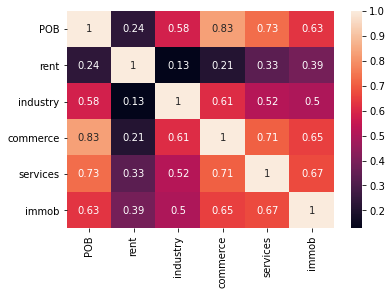

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
pairwise_correlation=y21[['POB','rent','industry','commerce','services','immob']].corr(method='kendall')
sns.heatmap(pairwise_correlation,annot=True)
plt.savefig('concl.png')

CODE
02003    450.0
02009    348.0
02025    297.0
02037    300.0
02069    300.0
         ...  
50251    350.0
50252    300.0
50272    445.0
50297    453.0
50298    370.0
Name: rent, Length: 1095, dtype: float64